# Import Libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

#  1. Load Dataset

In [56]:
# load dataset
df = pd.read_csv('D:\Video\Cars.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# 2. EDA & Feature Engineering

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [58]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2.1 Data Cleaning

In [59]:
# check 5 samlpes
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6018,Nissan Micra XL Optional,2015,346000,36422,Petrol,Dealer,Manual,First Owner,18.44 kmpl,1198 CC,75 bhp,104Nm@ 4000rpm,5.0
3698,Honda Amaze VX i-DTEC,2013,484999,50000,Diesel,Individual,Manual,First Owner,25.8 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
7327,Honda Jazz VX CVT,2019,840000,1500,Petrol,Individual,Automatic,First Owner,18.2 kmpl,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
7297,Hyundai Verna 1.6 CRDi S Option,2015,600000,80000,Diesel,Individual,Manual,First Owner,23.9 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
6412,Maruti Alto LX BSIII,2006,85000,60000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [60]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [61]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [62]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [63]:
df.mileage.nunique()

393

In [64]:
# helper functionto get numerical value

def get_value(x):
    try:
        return float(x.split()[0])
    except:
        return np.nan

In [65]:
df.mileage =  df.mileage.apply(lambda x: get_value(x))
df.mileage.unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01, 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 ,
       18.5 , 12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36,
       17.68, 14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  ,
       25.1 , 20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71,
       23.1 , 19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 ,
       21.21, 15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32,
       21.9 , 14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92,
       17.01, 22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  ,
       13.96, 18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 ,
       19.56, 22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 ,
       19.44, 13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 ,
       26.6 , 17.6 ,

In [66]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [67]:
df.engine =  df.engine.apply(lambda x: get_value(x))
df.engine.unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993.,   nan, 1198., 1199.,  998., 1591., 2179.,
       1368., 2982., 2494., 2143., 2477., 1462., 2755., 1968., 1798.,
       1196., 1373., 1598., 1998., 1086., 1194., 1172., 1405., 1582.,
        999., 2487., 1999., 3604., 2987., 1995., 1451., 1969., 2967.,
       2497., 1797., 1991., 2362., 1493., 1599., 1341., 1794.,  799.,
       1193., 2696., 1495., 1186., 1047., 2498., 2956., 2523., 1120.,
        624., 1496., 1984., 2354.,  814.,  793., 1799.,  936., 1956.,
       1997., 1499., 1948., 2997., 2489., 2499., 2609., 2953., 1150.,
       1994., 1388., 1527., 2199.,  995., 2993., 1586., 1390.,  909.,
       2393., 3198., 1339., 2835., 2092., 1595., 2496., 1596., 1597.,
       2596., 2148., 1299., 1590., 2231., 2694., 2200., 1795., 1896.,
       1796., 1422., 1489., 2359., 2197., 2999., 1781., 2650., 1343.,
       2446., 3498., 2198., 2776., 1950.])

In [68]:
df.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [69]:
df.max_power =  df.max_power.apply(lambda x: get_value(x))
df.max_power.unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,
        67.   ,  82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,
        88.8  ,  83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,
        81.83 ,  40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,
        83.14 ,  67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 ,
       103.25 , 171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,
        88.76 ,  86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 ,
       189.   ,  67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   ,
       120.   ,  94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 ,
       138.1  ,  83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   ,
       214.56 , 177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 ,
       204.   , 141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  ,
       108.5  , 103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  ,
       400.   ,  68.

In [70]:
len(df.name.unique())

2058

In [71]:
df["brand"] = df.name.apply(lambda x: x.split()[0])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,Tata


In [72]:
len(df.brand.unique())

32

In [73]:
# drop torque column
df.drop(columns=['torque'],axis=1,inplace=True)

In [74]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'brand'],
      dtype='object')

In [75]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

## 2.2 Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

fuel_encoder = LabelEncoder()
seller_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
owner_encoder = OrdinalEncoder(categories=[['Test Drive Car','First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner']])

In [77]:
df["fuel"] = fuel_encoder.fit_transform(df["fuel"])
df["seller_type"] = seller_encoder.fit_transform(df["seller_type"])
df["transmission"] = transmission_encoder.fit_transform(df["transmission"])

df["owner"] = owner_encoder.fit_transform(df[["owner"]])




# encode remaining columns

In [78]:
print(fuel_encoder.classes_)
print(seller_encoder.classes_)
print(transmission_encoder.classes_)
print(owner_encoder.categories_)

['CNG' 'Diesel' 'LPG' 'Petrol']
['Dealer' 'Individual' 'Trustmark Dealer']
['Automatic' 'Manual']
[array(['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)]


In [79]:
print(dict(zip(fuel_encoder.classes_, range(len(fuel_encoder.classes_)))))
print(dict(zip(seller_encoder.classes_, range(len(seller_encoder.classes_)))))
print(dict(zip(transmission_encoder.classes_, range(len(transmission_encoder.classes_)))))
print(dict(zip(owner_encoder.categories_[0], range(len(owner_encoder.categories_[0])))))

{'CNG': 0, 'Diesel': 1, 'LPG': 2, 'Petrol': 3}
{'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}
{'Automatic': 0, 'Manual': 1}
{'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}


## 2.3 Univariate analyis

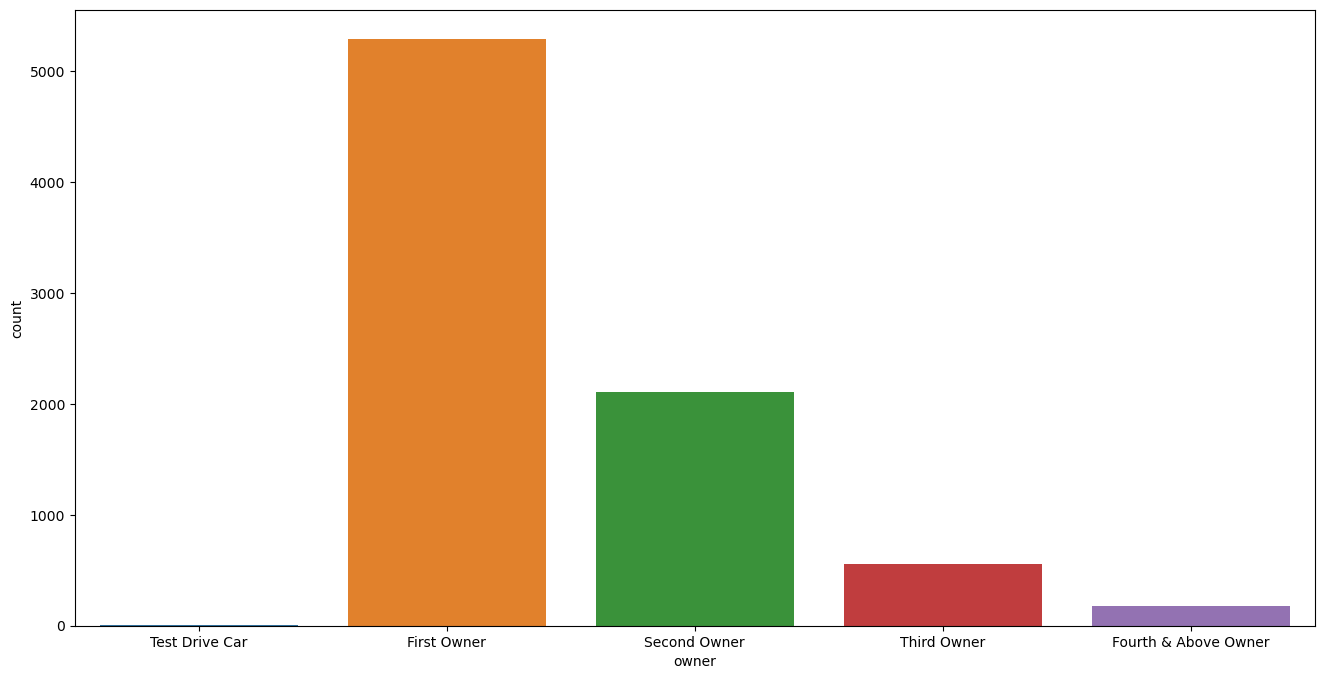

In [80]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'owner')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=owner_encoder.categories_[0])
plt.show()

count    7907.000000
mean     1458.625016
std       503.916303
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

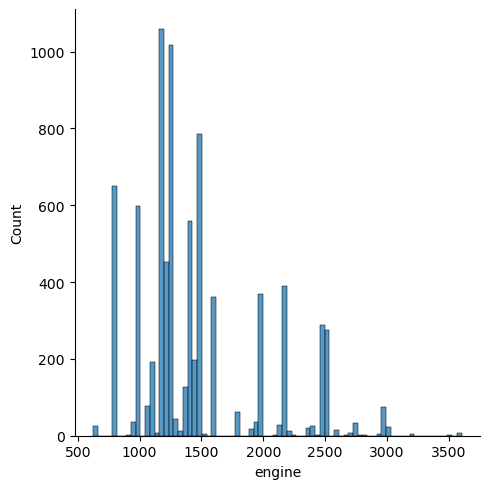

In [81]:
sns.displot(data = df, x = 'engine')
df["engine"].describe()

count    7912.000000
mean       91.517919
std        35.822499
min         0.000000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

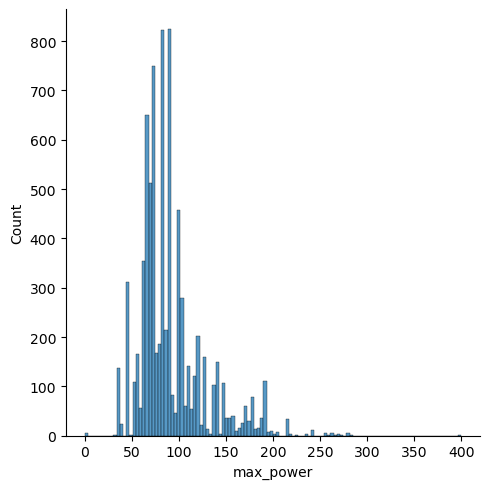

In [82]:
sns.displot(data = df, x = 'max_power')
df["max_power"].describe()

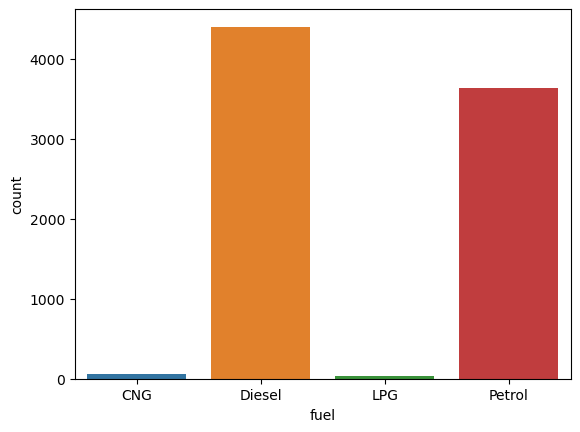

In [83]:
sns.countplot(data = df, x = "fuel")
plt.xticks(ticks=[0, 1, 2, 3], labels=fuel_encoder.classes_)
plt.show()

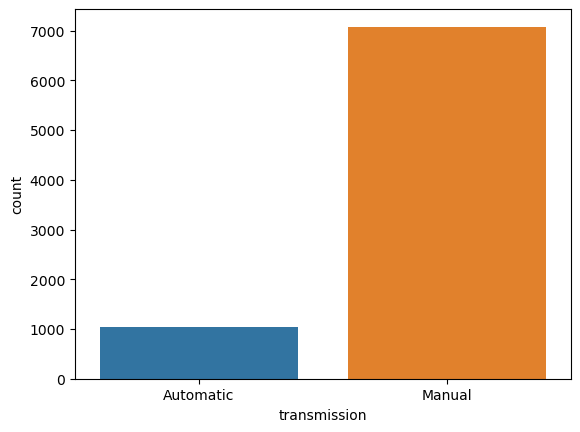

In [84]:
sns.countplot(data = df, x = "transmission")
plt.xticks(ticks=[0, 1], labels=transmission_encoder.classes_)
plt.show()

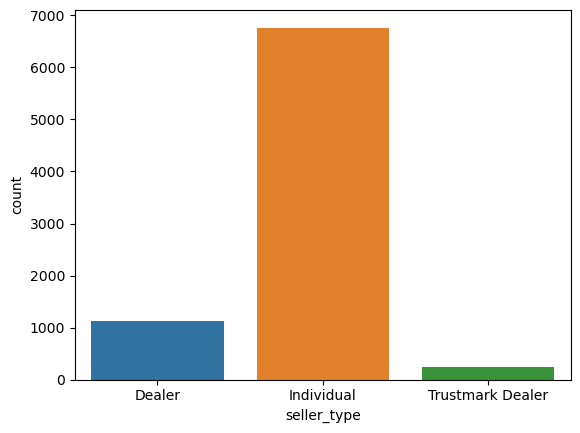

In [85]:
sns.countplot(data = df, x = "seller_type")
plt.xticks(ticks=[0, 1, 2], labels=seller_encoder.classes_)
plt.show()

## 2.4 Multivariate analysis

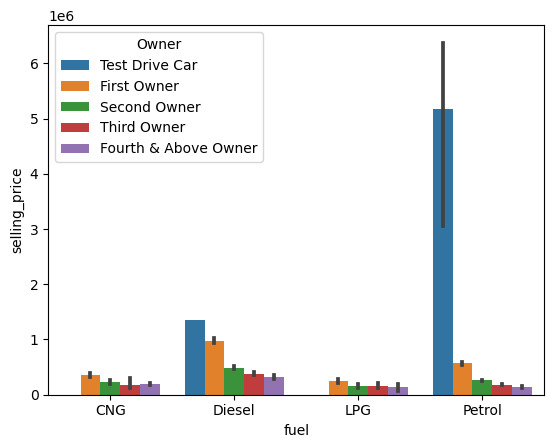

In [86]:
sns.barplot(data=df, x='fuel', y='selling_price', hue="owner")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, owner_encoder.categories_[0] , title="Owner")
plt.xticks(ticks=[0, 1, 2, 3], labels=fuel_encoder.classes_)
plt.show()

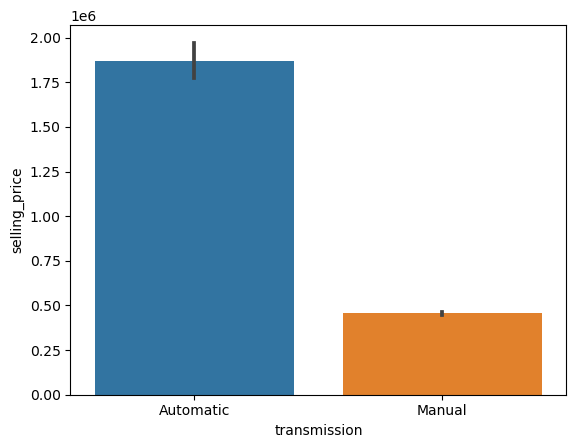

In [87]:
sns.barplot(data=df, x='transmission', y='selling_price')
plt.xticks(ticks=[0, 1], labels=transmission_encoder.classes_)
plt.show()

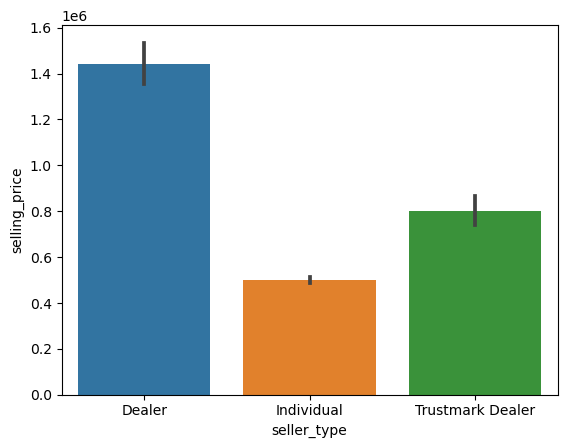

In [88]:
sns.barplot(data=df, x='seller_type', y='selling_price')
plt.xticks(ticks=[0, 1, 2], labels=seller_encoder.classes_)
plt.show()

In [96]:
highest_price = df["selling_price"].max()
highest_price_row = df[df["selling_price"] == highest_price]

print(highest_price_row)


                              name  year  selling_price  km_driven  fuel  \
170  Volvo XC90 T8 Excellence BSIV  2017       10000000      30000     3   

     seller_type  transmission  owner  mileage  engine  max_power  seats  \
170            1             0    1.0     42.0  1969.0      400.0    4.0   

     brand  
170  Volvo  


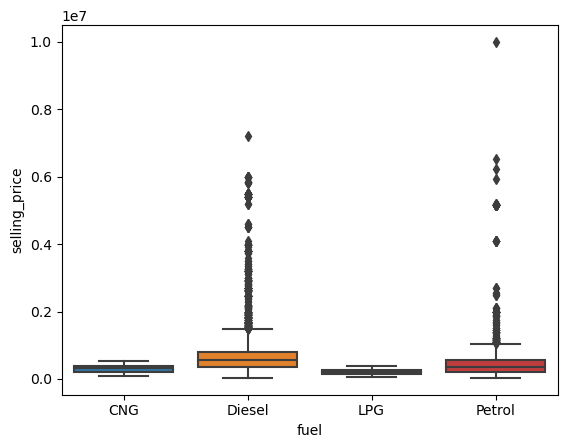

In [89]:
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.xticks(ticks=[0, 1, 2, 3], labels=fuel_encoder.classes_)
plt.show()

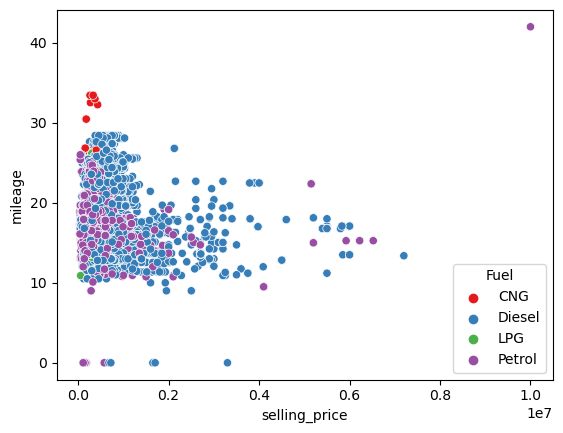

In [90]:
sns.scatterplot(data=df, x="selling_price", y="mileage", hue="fuel", palette="Set1")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, fuel_encoder.classes_ , title="Fuel")

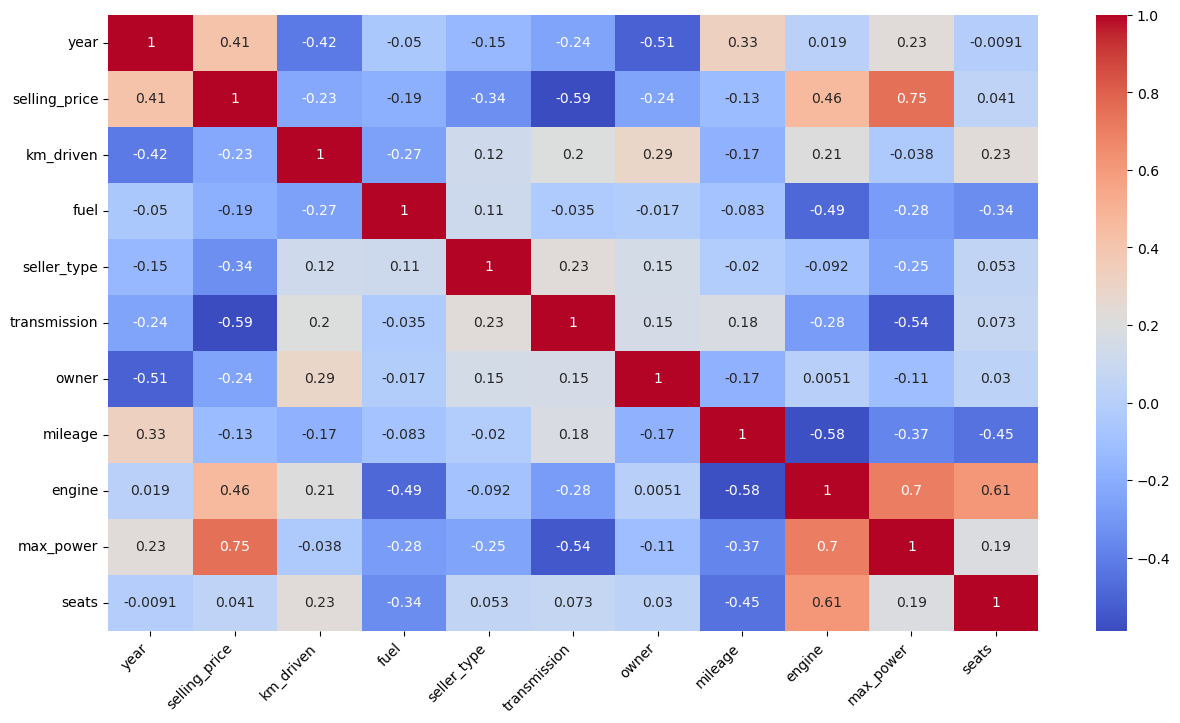

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.show()


In [100]:
corr = df.corr(numeric_only=True)
print(corr["selling_price"].sort_values(ascending=False))


selling_price    1.000000
max_power        0.748489
engine           0.455734
year             0.414092
seats            0.041358
mileage         -0.126054
fuel            -0.194029
km_driven       -0.225534
owner           -0.243316
seller_type     -0.335857
transmission    -0.588845
Name: selling_price, dtype: float64


# 3. Feature Selection

In [101]:
# select x features
X = df[["max_power", "engine", "year", "transmission"]]
y = df["selling_price"]

In [102]:
y = np.log(y)
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8128, dtype: float64

In [103]:
X

,max_power,engine,year,transmission
0,74.00,1248.0,2014,1
1,103.52,1498.0,2014,1
2,78.00,1497.0,2006,1
3,90.00,1396.0,2010,1
4,88.20,1298.0,2007,1
...,...,...,...,...
8123,82.85,1197.0,2013,1
8124,110.00,1493.0,2007,1
8125,73.90,1248.0,2009,1
8126,70.00,1396.0,2013,1


## 3.1 Train and Test Split

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 4. Preprocessing

In [105]:
X_train.shape

(6502, 4)

In [106]:
X_train.isnull().any()

max_power        True
engine           True
year            False
transmission    False
dtype: bool

In [107]:
X_train.engine.isnull().sum()

170

In [108]:
X_train.max_power.isnull().sum()

167

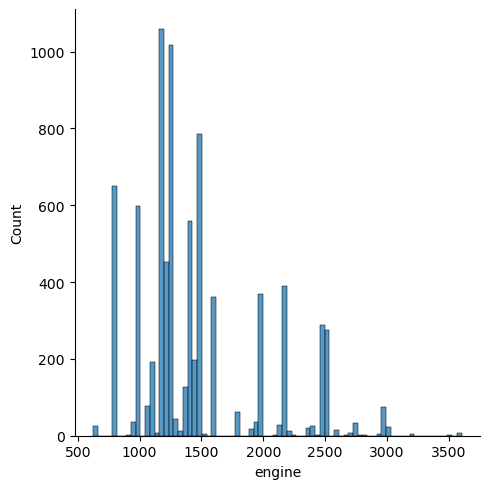

In [109]:
sns.displot(data=df, x="engine")

In [113]:
df.engine.mode()



1248.0

In [114]:
df.engine.mean()

1458.625015808777

In [115]:
df.engine.median()

1248.0

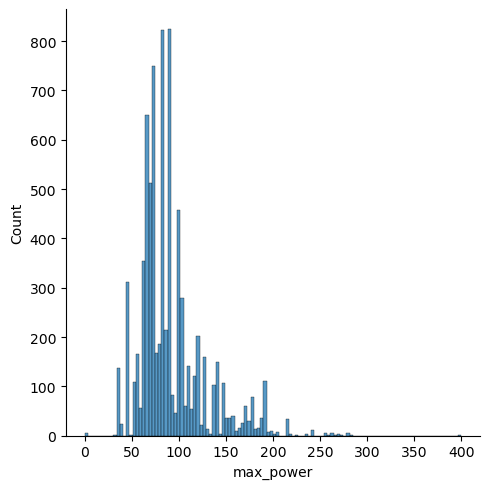

In [110]:
sns.displot(data=df, x="max_power")

In [116]:
X_train['engine'].fillna(X_train['engine'].mode()[0], inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [117]:
y_train.isnull().sum()

0

In [119]:
X_train.isnull().sum()

max_power       0
engine          0
year            0
transmission    0
dtype: int64

In [122]:
X_test.isnull().any()

max_power       False
engine          False
year            False
transmission    False
dtype: bool

In [120]:
X_test['engine'].fillna(X_test['engine'].mode()[0], inplace=True)
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)

In [121]:
y_test.isnull().sum()

0

In [123]:
X_train

,max_power,engine,year,transmission
6518,83.81,1199.0,2019,0
6144,86.80,1198.0,2013,1
6381,90.00,1396.0,2011,1
438,74.00,1248.0,2013,1
5939,67.05,998.0,2017,1
...,...,...,...,...
5226,120.00,2179.0,2009,1
5390,74.00,1248.0,2014,1
860,81.83,1197.0,2016,1
7603,74.02,1248.0,2019,1


# 5 Model Selection

In [125]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train , y_train)
y_predict = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_predict))
print("r2: ", r2_score(y_test, y_predict))

MSE:  0.10131898192592934
r2:  0.8521076827689158


## 5.1 Cross validation

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [128]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.11660537 -0.10741617 -0.09927252 -0.10354853 -0.09880104]; Mean: -0.10512872496464823
SVR - Score: [-0.34760051 -0.34781349 -0.35834429 -0.34716678 -0.31864875]; Mean: -0.34391476287226996
KNeighbors Regressor - Score: [-0.07641632 -0.0671599  -0.06739471 -0.07280547 -0.05505608]; Mean: -0.0677664967108855
Decision-Tree Regressor - Score: [-0.06713016 -0.05635557 -0.07385551 -0.06174898 -0.0700111 ]; Mean: -0.0658202645991065
Random-Forest Regressor - Score: [-0.06299692 -0.05742279 -0.06239671 -0.05428282 -0.0477869 ]; Mean: -0.056977227931581095


## 5.2 Grid Search

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor()

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train);

In [130]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 12}

In [131]:
best_mse = grid.best_score_

In [132]:
best_mse

-0.057218355261360834

# 6. Testing

In [133]:
y_predict = grid.predict(X_test)
mean_squared_error(y_test, y_predict)

0.055247374001861416

# 7. Inference

In [135]:
import pickle


filename = 'car_price_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [136]:
loaded_model = pickle.load(open(filename, 'rb'))

In [149]:
sample = df.sample()[["max_power", "engine", "year", "transmission"]]
sample

,max_power,engine,year,transmission
7984,126.32,1582.0,2014,1


In [150]:
result = df.loc[sample.index[0]]["selling_price"]
result

730000

In [151]:
predicted_car_price = loaded_model.predict(sample)
np.exp(predicted_car_price)

array([635845.37079302])

In [153]:

sample_manual = pd.DataFrame({
    "max_power": [150],
    "engine": [1200],
    "year": [2018],
    "transmission": [1]  # If you encoded transmission: 0=Manual, 1=Automatic
})

result = df.loc[sample.index[0]]["selling_price"]
print("Actual selling price:", result)


Actual selling price: 730000


# 8. Analysis: Feature Importance

In [154]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.40663582, 0.08955077, 0.50010657, 0.00370684])

<BarContainer object of 4 artists>

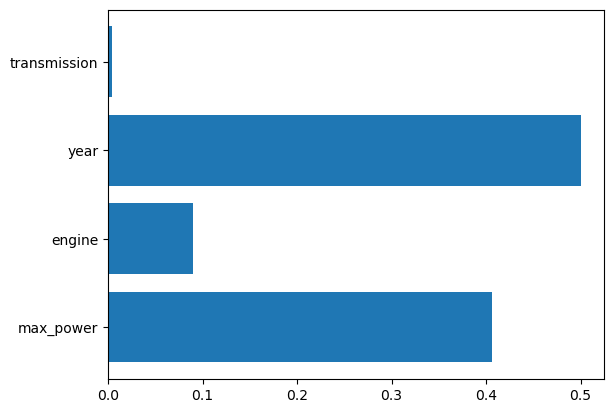

In [155]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

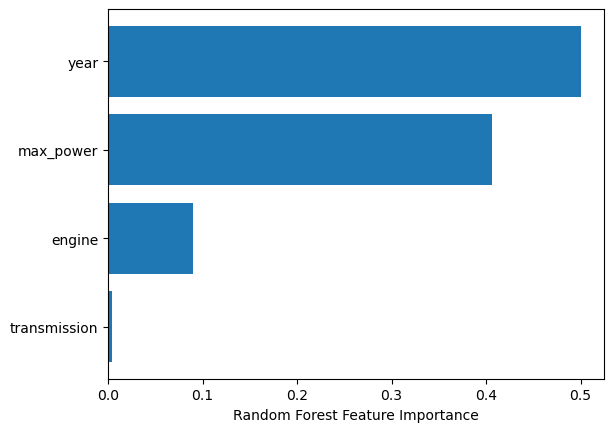

In [156]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Conclusion: Year and Max Power features play as the important roles in prediction of selling price becasue in real world, people always find the latest model which has maximum engine power. On the other hand, engine and transmission types slightly influence the selling price is reasonable. Correlation, but not very important- transmission For example: two cars of same year and engine, one manual, one automatic → automatic will be slightly higher.